In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('~/Dev/tvsquared-backend/tvsquared/tmp/cw/data/all_clients_jobs_less_than_6_archive_2510_1008.csv', header=0)
df_trimmed =  df.drop(['Unnamed: 0', 'total_cost', 'total_time_in_queue', 
                         'total_time_under_calculation', 'total_time_waiting',
                         'total_time_waiting', 'total_time_under_calculation',
                         'total_cost', 'spot_finish','totalrowcount', 'spot_total', 
                         'spot_start', 'spot_granularity_1', 
                         'workticket_scheduled', 'workticket_started', 'workticket_finished'], axis=1)

cols = df_trimmed.columns.tolist()

new_cols = []
new_cols.insert(0, 'cluster_info')
new_cols.insert(0, 'jobcount')
new_cols.insert(0, 'workticketid')
new_cols.insert(0, 'lag')
new_cols.insert(0, 'origin')
new_cols.insert(0, 'last_job_time')
new_cols.insert(0, 'last_job')
new_cols.insert(0, 'workticket_duration')
new_cols.insert(0, 'jobpriority')
new_cols.insert(0, 'lag_actions')
new_cols.insert(0, 'max_lag')
new_cols.insert(0, 'micro')
new_cols.insert(0, 'diffuse')
new_cols.insert(0, 'spot_duration')
new_cols.insert(0, 'modelrowcount')
new_cols.insert(0, 'rawsize')
new_cols.insert(0, 'slug')
new_cols.insert(0, 'clientid')
new_cols.insert(0, 'brandid')

df_trimmed = df_trimmed[new_cols]
mask = df_trimmed['cluster_info'].str.contains('clone', na=False)
rem_clones = df_trimmed[mask == False]
mask = rem_clones['slug'].str.contains('NaN', na=False)
rem_NaN = rem_clones[mask == False]
rename = rem_NaN.rename(columns={'modelrowcount': 'total_number_of_spots_upld'})
rename.dropna(subset=['slug'], inplace=True)
print (rename)

     brandid  clientid                 slug       rawsize  \
0          1       952      ihg-holiday-inn  6.122316e+10   
1          1       367         madison-reed  1.130000e+11   
2          1       367         madison-reed  1.130000e+11   
3          1      1221                earny  9.382938e+08   
5          1      1337               hollar  2.360000e+11   
6          1      1338          trippingcom  5.619301e+10   
7          1      1560          gwynnie-bee  3.255237e+09   
8          1       952      ihg-holiday-inn  6.122316e+10   
9          1       952      ihg-holiday-inn  6.122316e+10   
10         1       367         madison-reed  1.130000e+11   
11         1       367         madison-reed  1.130000e+11   
12         1      1221                earny  9.382938e+08   
14         1      1337               hollar  2.360000e+11   
15         1      1337               hollar  2.360000e+11   
16         1      1338          trippingcom  5.619301e+10   
17         1      1383  

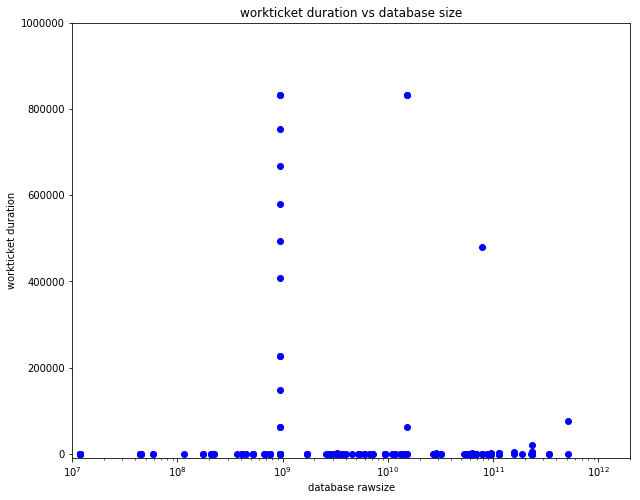

In [39]:
# create a figure
fig1 = plt.figure(figsize=(10,8))
ax1= plt.gca()

# create the data type to be entered in the graph
ax1.scatter(rename['rawsize'], rename['workticket_duration'], marker="o", color='b', label='workticket durration' )

# chart axes, title and legend
plt.title("workticket duration vs database size")
plt.ylabel("workticket duration")
plt.xlabel("database rawsize")
ax1.set_xscale('log')
ax1.axis([10000000, 2000000000000, -10000,1000000])

# figure boundaries

plt.show()



In [49]:
rename.sort_values('rawsize')

wkt_tic = rename[rename.workticket_duration < 250]
wkt_tic.sort_values('workticket_duration')
wkt_tic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 424
Data columns (total 19 columns):
brandid                       329 non-null int64
clientid                      329 non-null int64
slug                          329 non-null object
rawsize                       329 non-null float64
total_number_of_spots_upld    22 non-null float64
spot_duration                 77 non-null float64
diffuse                       329 non-null object
micro                         329 non-null object
max_lag                       329 non-null float64
lag_actions                   329 non-null float64
jobpriority                   329 non-null float64
workticket_duration           329 non-null float64
last_job                      329 non-null object
last_job_time                 329 non-null float64
origin                        329 non-null object
lag                           329 non-null object
workticketid                  329 non-null object
jobcount                      329 non-nul

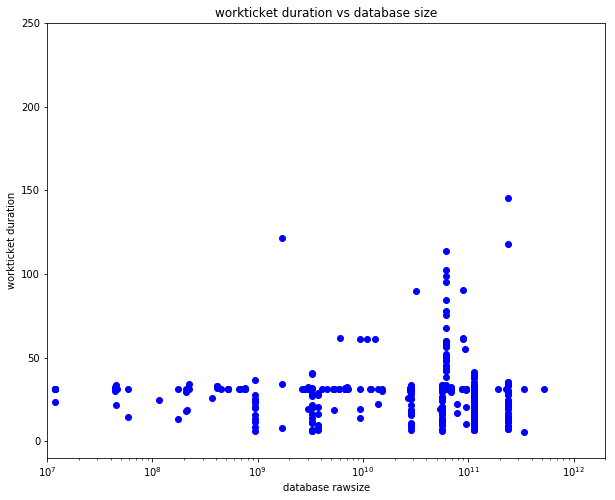

In [53]:
# create a figure
fig1 = plt.figure(figsize=(10,8))
ax1= plt.gca()

# create the data type to be entered in the graph
ax1.scatter(wkt_tic['rawsize'], wkt_tic['workticket_duration'], marker="o", color='b', label='workticket durration' )

# chart axes, title and legend
plt.title("workticket duration vs database size")
plt.ylabel("workticket duration")
plt.xlabel("database rawsize")
ax1.set_xscale('log')
ax1.axis([10000000, 2000000000000, -10,250])

# figure boundaries

plt.show()



In [54]:
wkt_tic

,brandid,clientid,slug,rawsize,total_number_of_spots_upld,spot_duration,diffuse,micro,max_lag,lag_actions,jobpriority,workticket_duration,last_job,last_job_time,origin,lag,workticketid,jobcount,cluster_info
0,1,952,ihg-holiday-inn,6.122316e+10,NaN,NaN,False,True,0.0,0.0,1008.00,38.182,INF.SENDEMAIL,0.773,US(2),False,59a8e955b43fdd3d086b6d6f,3,{u'4': 1}
1,1,367,madison-reed,1.130000e+11,NaN,NaN,True,True,14.0,2.0,1008.00,11.619,INF.SENDEMAIL,0.797,US(1),True,59a9946db43fdd01dc8719fc,3,{u'1': 1}
2,1,367,madison-reed,1.130000e+11,NaN,NaN,True,True,14.0,2.0,1008.00,16.046,INF.SENDEMAIL,1.402,US(1),True,59a99470b43fdd01dc8719ff,3,{u'1': 1}
6,1,1338,trippingcom,5.619301e+10,NaN,NaN,True,True,14.0,2.0,1008.00,11.609,INF.SENDEMAIL,0.753,US(1),True,59a99484b43fdd01dc871a09,3,{u'1': 1}
7,1,1560,gwynnie-bee,3.255237e+09,NaN,NaN,False,True,0.0,0.0,1008.00,40.521,INF.SENDEMAIL,1.473,US(1),False,59a9b08db43fdd2b8d6cbf18,3,{u'4': 1}
8,1,952,ihg-holiday-inn,6.122316e+10,NaN,NaN,False,True,0.0,0.0,1008.00,33.855,INF.SENDEMAIL,0.759,US(2),False,59aa3ad6b43fdd618023ec16,3,{u'4': 1}
9,1,952,ihg-holiday-inn,6.122316e+10,NaN,NaN,False,True,0.0,0.0,1008.00,48.394,INF.SENDEMAIL,0.774,US(2),False,59ab8c56b43fdd5475adc1b0,3,{u'4': 1}
10,1,367,madison-reed,1.130000e+11,NaN,NaN,True,True,14.0,2.0,1008.00,21.276,INF.SENDEMAIL,0.757,US(1),True,59ac538db43fdd667ea9e221,3,{u'1': 1}
11,1,367,madison-reed,1.130000e+11,NaN,NaN,True,True,14.0,2.0,1008.00,18.955,INF.SENDEMAIL,0.748,US(1),True,59ac538fb43fdd667ea9e224,3,{u'1': 1}
14,1,1337,hollar,2.360000e+11,NaN,NaN,True,True,14.0,3.0,1008.00,30.026,INF.SENDEMAIL,0.950,US(1),True,59ac5393b43fdd667ea9e22a,3,NaN
